<a href="https://colab.research.google.com/github/kanxshkk/ml/blob/main/ml_21pw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spectral Clustering

Silhouette Score: 0.48288533694691294
Davies-Bouldin Score: 0.756411707211405
Calinski-Harabasz Score: 598.2366411738275


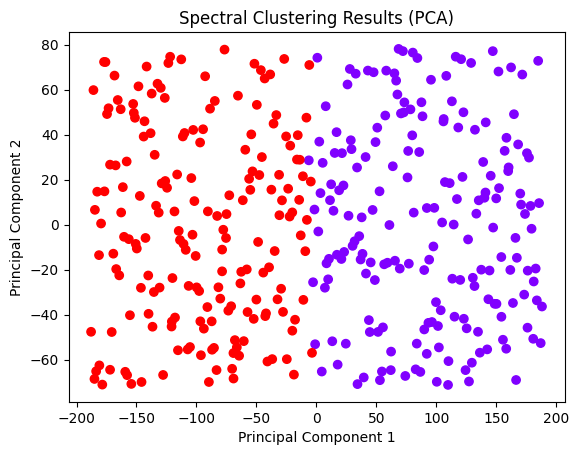

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt


df = pd.read_excel('data.xlsx')


df.fillna(0, inplace=True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1].values
data_points = np.hstack((X, y.reshape(-1, 1)))

n_clusters = 2

spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral_clustering.fit_predict(data_points)

silhouette_avg = silhouette_score(data_points, labels)
davies_bouldin = davies_bouldin_score(data_points, labels)
calinski_harabasz = calinski_harabasz_score(data_points, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_points)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title('Spectral Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

df['Cluster'] = labels

df.to_excel('clustered_data.xlsx', index=False)

plt.show()


Fuzzy C means

Silhouette Score: 0.4835238158477155
Davies-Bouldin Score: 0.756014427090546
Calinski-Harabasz Score: 599.6961948402683


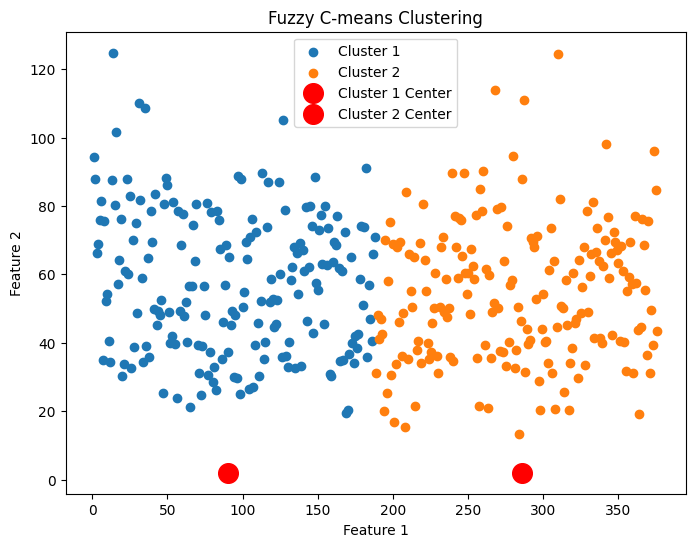

In [ ]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df = pd.read_excel('data.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1] .values
data_points = np.hstack((X, y.reshape(-1, 1)))

n_clusters = 2

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_points.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

predicted_clusters = np.argmax(u, axis=0)

silhouette_avg = silhouette_score(data_points,predicted_clusters)
davies_bouldin = davies_bouldin_score(data_points,predicted_clusters)
calinski_harabasz = calinski_harabasz_score(data_points,predicted_clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(data_points[predicted_clusters == cluster, 0], y[predicted_clusters == cluster], label=f'Cluster {cluster + 1}')

cntr = cntr.T

for cluster in range(n_clusters):
    plt.scatter(cntr[0, cluster], cntr[1, cluster], marker='o', color='red', s=200, label=f'Cluster {cluster + 1} Center')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Fuzzy C-means Clustering')
plt.show()


Mean shift clustering

Silhouette Score: 0.4802584928026405
Davies-Bouldin Score: 0.756458328784563
Calinski-Harabasz Score: 588.3528884449338


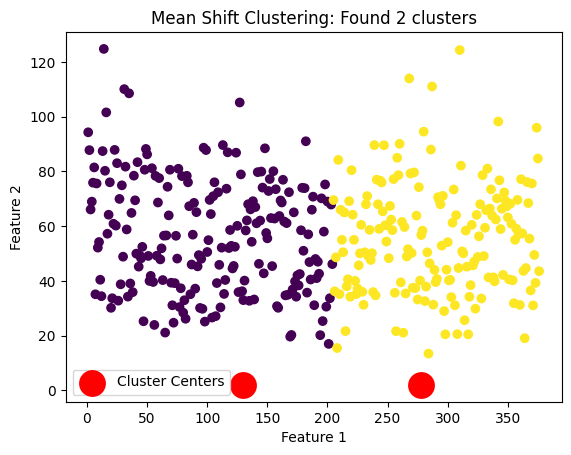

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

df = pd.read_excel('data.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1] .values
data_points = np.hstack((X, y.reshape(-1, 1)))

ms = MeanShift()
ms.fit(data_points)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

silhouette_avg = silhouette_score(data_points, labels)
davies_bouldin = davies_bouldin_score(data_points, labels)
calinski_harabasz = calinski_harabasz_score(data_points, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
num_clusters = len(np.unique(labels))
plt.scatter(X[:, 0], y, c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', color='red', s=300, linewidth=2, label='Cluster Centers')
plt.title(f'Mean Shift Clustering: Found {num_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


HIERARCHICAL CLUSTERING

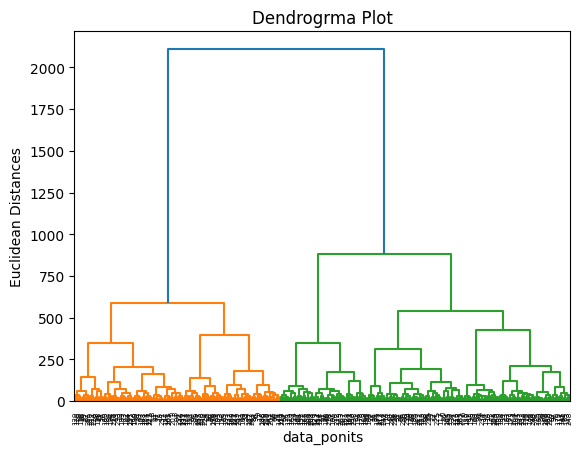

Silhouette Score: 0.44043450376889687
Davies-Bouldin Score: 0.7734639112803392
Calinski-Harabasz Score: 464.4211571993601


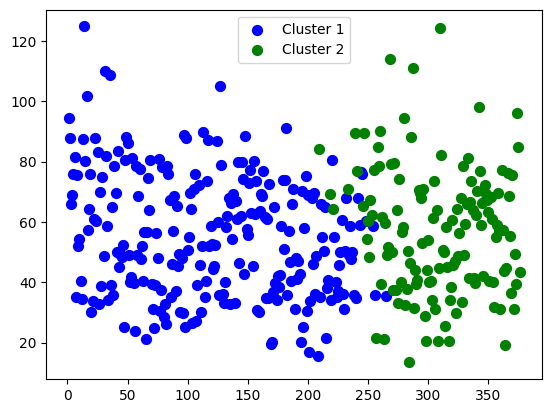

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as mtp

df = pd.read_excel('data.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1] .values
data_points = np.hstack((X, y.reshape(-1, 1)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

dendro = shc.dendrogram(shc.linkage(X_train, method="ward"))
mtp.title("Dendrogrma Plot")
mtp.ylabel("Euclidean Distances")
mtp.xlabel("data_ponits")
mtp.show()

from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred= hc.fit_predict(data_points)
silhouette_avg = silhouette_score(data_points, y_pred)
davies_bouldin = davies_bouldin_score(data_points, y_pred)
calinski_harabasz = calinski_harabasz_score(data_points, y_pred)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

mtp.scatter(X[y_pred == 0, 0], y[y_pred == 0], s = 50, c = 'blue', label = 'Cluster 1')
mtp.scatter(X[y_pred == 1, 0], y[y_pred == 1], s = 50, c = 'green', label = 'Cluster 2')

mtp.legend()
mtp.show()

K means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4835238158477155
Davies-Bouldin Score: 0.756014427090546
Calinski-Harabasz Score: 599.6961948402683


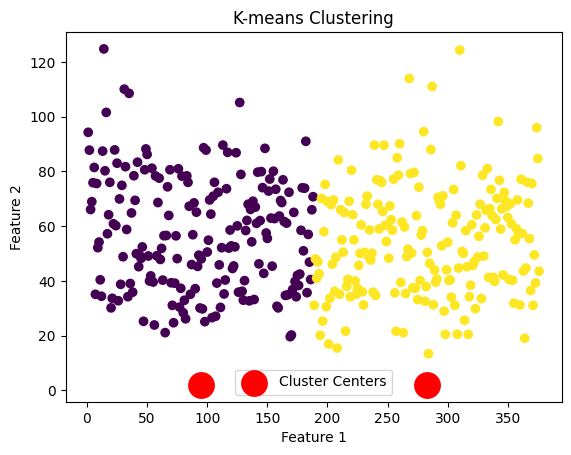

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

df = pd.read_excel('data.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1] .values
data_points = np.hstack((X, y.reshape(-1, 1)))

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_points)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
silhouette_avg = silhouette_score(data_points, labels)
davies_bouldin = davies_bouldin_score(data_points, labels)
calinski_harabasz = calinski_harabasz_score(data_points, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
plt.scatter(data_points[:,0], y[:], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', color='red', s=300, linewidth=2, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-means Clustering')
plt.show()
